Primer acercamiento a deep learning, ejercicio de Fashion Mnist.

In [ ]:
#Funciones y librerias
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

def predict_n_validate_individual_samples(index):
    plt.figure()
    plt.imshow(test_x[index].reshape(28, 28))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.show()
    print("Actual Value: ", class_names[test_y[index]])
    print("Model Prediction: ", class_names[np.argmax(model.predict(test_x[index].reshape(1, 28, 28, 1)))])

# code to visualize individual sample
def plot_sample(df, index):
    plt.figure()
    plt.imshow(df[index].reshape(28, 28))
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [5]:
train_images = pd.read_csv(r'C:\MIGUEL\Máster\Modulo 1\data\raw\Fashion_mnist\fashion-mnist_train.csv')
test_images = pd.read_csv(r'C:\MIGUEL\Máster\Modulo 1\data\raw\Fashion_mnist\fashion-mnist_test.csv')

print(train_images.shape)
print(test_images.shape)

(60000, 785)
(10000, 785)


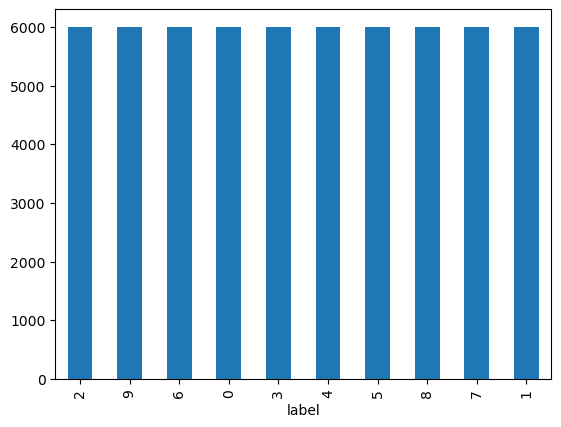

In [7]:
train_images.label.value_counts().plot(kind='bar')
plt.show()

In [9]:
# Separate out the label column from the training features
# This step makes it easier to handle the data for training

# code below using python slicing
# [:, 1:] - means - all rows, all columns except first column
# .values converts the pandas dataframe into a numpy array

train_x = train_images.iloc[:, 1:].values
train_y = train_images.label.values

test_x = test_images.iloc[:, 1:].values
test_y = test_images.label.values

In [11]:
# Assign the class names to a list
# This helps better understand the class of predicted as well as the
# displayed image

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

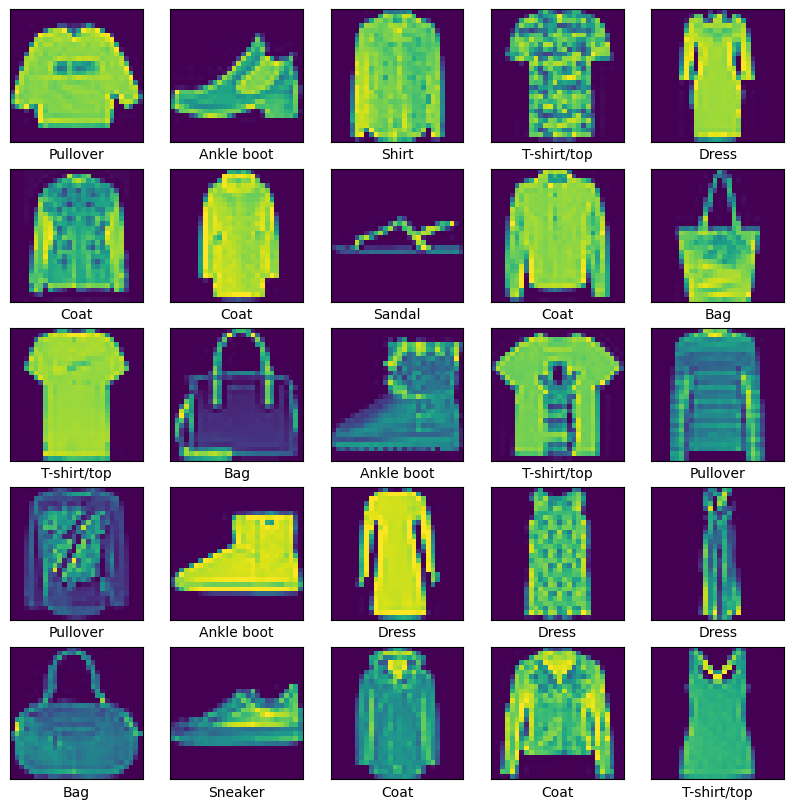

In [13]:
# Code for visualizing 25 images in the dataset
# It is always important to frequently visualize and validate the data before training the model

plt.figure(figsize=(10,10)) # create an empty figure
for i in range(25): # loop through first 25 rows
    plt.subplot(5,5,i+1) # create a 5x5 subplot and iterate through each
    plt.xticks([]) # removing the ticks on x-axis
    plt.yticks([]) # removing the ticks on y-axis
    plt.grid(False) # disabling the grid

    # before plotting the image
    # the image is reshape into 28x28 shape
    # this is because the original data is a single 1d array with 784 columns
    # each indicating a pixel value

    plt.imshow(train_x[i].reshape(28, 28))
    plt.xlabel(class_names[train_y[i]]) # assigning the labels
plt.show()

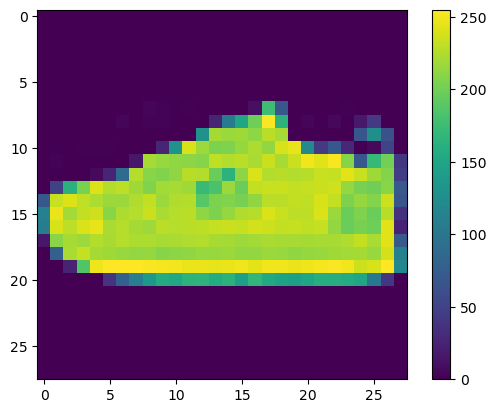

In [15]:
# Using the helper function defined earlier
plot_sample(train_x, 59999)

In [17]:
train_x = train_x / 255.0
test_x = test_x / 255.0

Sample image after Scaling


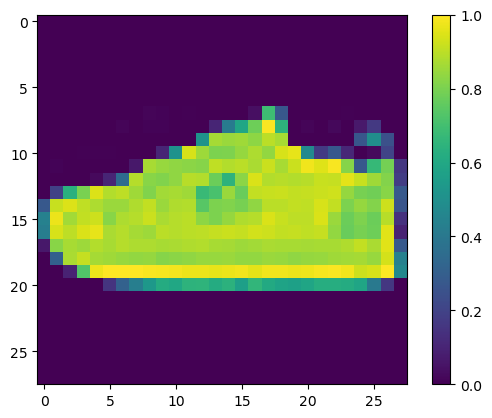

In [19]:
print("Sample image after Scaling")
plot_sample(train_x, 59999)

In [21]:
# using the train_test_split function from scikit-learn
# specifying a test size of 20%
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)

In [23]:
# keras Sequential allows us to stack different layers of
# the model architecture
model = Sequential([
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') # 10 units as we have 10 output classes, softmax activation as we need the probability output
])

In [25]:
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
# the model metrics and training performance is captured
# in variable model_history
model1_history = model.fit(train_x.reshape(train_x.shape[0], 28, 28, 1),
                    train_y,
                    epochs=10,
                    validation_data=(val_x.reshape(val_x.shape[0], 28, 28, 1), val_y),
                   )

Epoch 1/10


C:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7661 - loss: 0.6677 - val_accuracy: 0.8439 - val_loss: 0.4413
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8513 - loss: 0.4075 - val_accuracy: 0.8577 - val_loss: 0.3952
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8727 - loss: 0.3546 - val_accuracy: 0.8770 - val_loss: 0.3546
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8831 - loss: 0.3283 - val_accuracy: 0.8787 - val_loss: 0.3435
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8863 - loss: 0.3080 - val_accuracy: 0.8791 - val_loss: 0.3435
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8929 - loss: 0.2930 - val_accuracy: 0.8748 - val_loss: 0.3462
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8989 - loss: 0.2790 - val_accuracy: 0.8819 - val_loss: 0.3327
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9005 - loss: 0.2671 - val_accurac

In [28]:
# Plotting the model architecture
plot_model(model)

You must install pydot (`pip install pydot`) for `plot_model` to work.


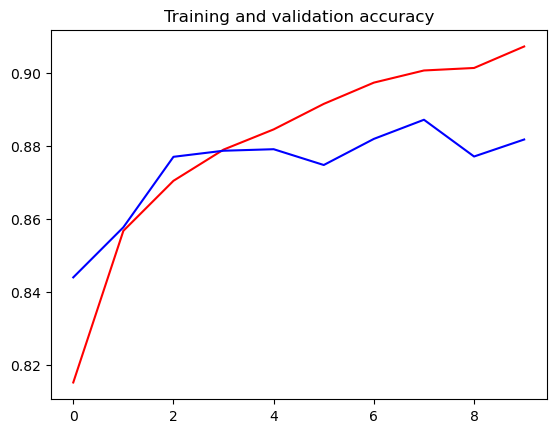

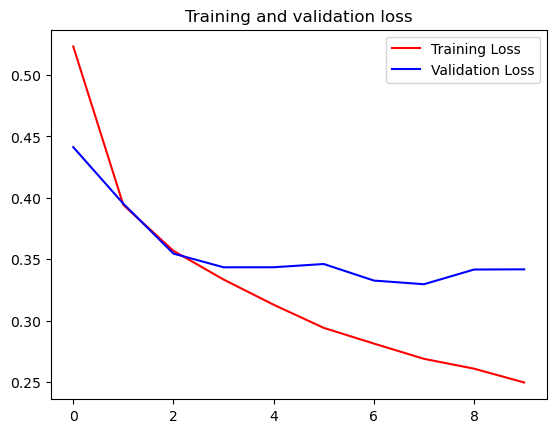

In [31]:
acc = model1_history.history['accuracy']
val_acc = model1_history.history['val_accuracy']
loss = model1_history.history['loss']
val_loss = model1_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [33]:
# Evalution on the test set
test_loss, test_acc = model.evaluate(test_x.reshape(test_x.shape[0], 28, 28, 1), test_y)
print('\nTest accuracy:', test_acc)

 31/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8598 - loss: 0.3504   

C:\Users\Usuario\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8728 - loss: 0.3333

Test accuracy: 0.8792999982833862


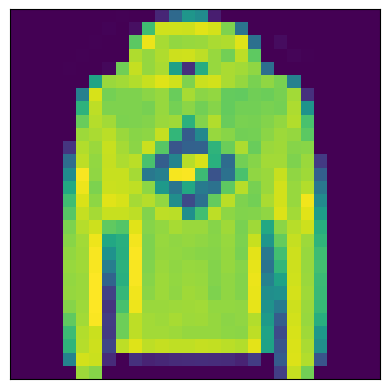

Actual Value:  Pullover
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Model Prediction:  Coat

Test accuracy: 0.8792999982833862


In [35]:
predict_n_validate_individual_samples(1000)
print('\nTest accuracy:', test_acc)